In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [43]:
iris = datasets.load_iris()
X= iris.data
y = iris.target

In [44]:
X = X[y != 2]
y = y[y != 2]


In [45]:
n_samples, n_features = X.shape

In [46]:
#Add noisy features
rs = np.random.RandomState(0)

X = np.c_[X,rs.randn(n_samples,200*n_features)]

In [47]:
clf =  SVC(kernel='linear', probability=True, random_state=rs)

In [48]:
# 'tprs' and 'aucs' are lists to store True Positive Rates (TPRs)
# and Area Under the Curve (AUC) values for each fold
tprs = []
aucs = []
# 'mean_fpr' is an array of false positive rate values ranging from 0 to 1.
mean_fpr = np.linspace(0, 1, 100)
cv = StratifiedKFold(6)

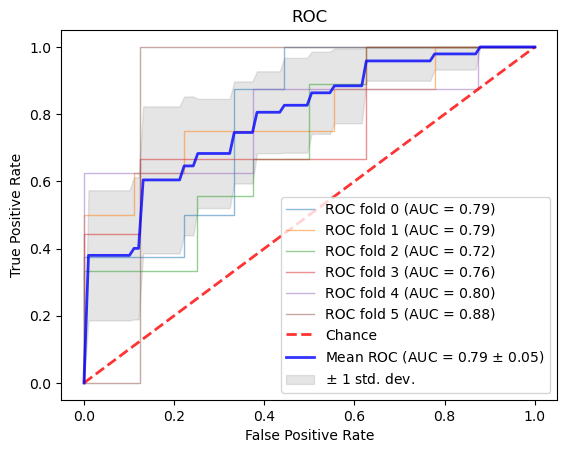

In [49]:
i = 0
for train , test in cv.split(X,y):
    pred =  clf.fit(X[train],y[train]).predict_proba(X[test])
    
    fpr,tpr,thresholds = roc_curve(y[test],pred[:,1])
    
    tprs.append(np.interp(mean_fpr,fpr,tpr))
    tprs[-1][0]= 0.0
    roc_auc= auc(fpr,tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.5, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    
    
plt.plot([0,1],[0.,1],linestyle='--',lw=2,color='r',label='Chance',alpha=0.8)

mean_tpr = np.mean(tprs,axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs)


plt.plot(mean_fpr,mean_tpr,color='b',label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right");